In [69]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [70]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [145]:
import numpy as np

In [95]:
from sklearn.model_selection import train_test_split

In [72]:
def calc_nvt(symbol):
    # Get Into The Block blockchain data from CryptoCompare API
    url = 'https://min-api.cryptocompare.com/data/blockchain/histo/day?api_key=015b242e7bed3700ca69182009d5c7af87bf6b83f7c5a0e12eb5a9b01bee3fb0&limit=2000&fsym=' + symbol
    data = requests.get(url).json()["Data"]["Data"]
    df = pd.DataFrame(data) 
    
    # Calculate 
    df['nvt'] = df['current_supply'] / df['transaction_count'] / df['average_transaction_value']
    
    # Get pricing data from CryptoCompare API
    price_url = 'https://min-api.cryptocompare.com/data/v2/histoday?tsym=USD&limit=2000&api_key=faffd9561a88b875387fb603ac0763ee8f7ed54814e1d601358bd2657947280a&fsym=' + symbol
    histo_data = requests.get(price_url).json()["Data"]["Data"]
    
    df_price = pd.DataFrame(histo_data)
    
    combined = df.set_index('time').join(df_price.set_index('time'), on='time')
    
    return combined

In [73]:
btc_df = calc_nvt('BTC')

In [74]:
btc_df.head()

,active_addresses,average_transaction_value,block_height,block_size,block_time,current_supply,difficulty,hashrate,id,large_transaction_count,...,zero_balance_addresses_all_time,nvt,close,conversionSymbol,conversionType,high,low,open,volumefrom,volumeto
time,,,,,,,,,,,,,,,,,,,,,
1424304000,214089,7.526654,344285,315926,518.175758,1.385714e+07,4.445542e+10,368474.508691,1182,153,...,57913794,19.471567,241.92,,direct,244.11,234.87,235.20,66053.23,15852470.09
1424390400,247984,8.039311,344443,382549,547.242038,1.386109e+07,4.445542e+10,348903.308508,1182,163,...,58034380,17.466254,244.52,,direct,247.76,238.83,241.92,83584.59,20434846.70
1424476800,271658,7.018058,344585,401512,607.411348,1.386464e+07,4.445542e+10,314341.440061,1182,165,...,58137834,22.493840,244.41,,direct,247.32,242.65,244.52,42952.95,10570761.56
1424563200,272262,5.586223,344736,356274,565.373333,1.386841e+07,4.447018e+10,337826.257171,1182,102,...,58236917,29.227123,235.73,,direct,246.54,232.72,244.41,75700.07,18107359.63
1424649600,250127,8.197847,344878,404722,604.319149,1.387196e+07,4.668438e+10,331791.355392,1182,144,...,58357408,16.668939,238.82,,direct,240.06,231.33,235.73,62672.06,14856549.49


In [75]:
btc_df.columns

Index(['active_addresses', 'average_transaction_value', 'block_height',
       'block_size', 'block_time', 'current_supply', 'difficulty', 'hashrate',
       'id', 'large_transaction_count', 'new_addresses', 'symbol',
       'transaction_count', 'transaction_count_all_time',
       'unique_addresses_all_time', 'zero_balance_addresses_all_time', 'nvt',
       'close', 'conversionSymbol', 'conversionType', 'high', 'low', 'open',
       'volumefrom', 'volumeto'],
      dtype='object')

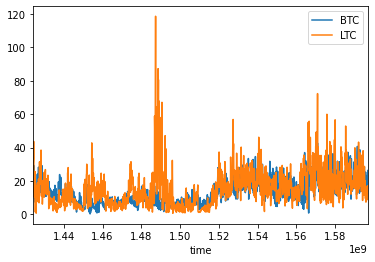

In [76]:
coin_list = ['BTC', 'LTC']
nvt_df = pd.DataFrame()
for coin in coin_list:
    df = calc_nvt(coin)
    nvt_df[coin] = df['nvt']
nvt_df.plot()

In [77]:
btc_df.reset_index(inplace = True)

In [78]:
btc_df['time'] = pd.to_datetime(btc_df['time'], unit = 's')
btc_df.head(2)

,time,active_addresses,average_transaction_value,block_height,block_size,block_time,current_supply,difficulty,hashrate,id,...,zero_balance_addresses_all_time,nvt,close,conversionSymbol,conversionType,high,low,open,volumefrom,volumeto
0,2015-02-19,214089,7.526654,344285,315926,518.175758,1.385714e+07,4.445542e+10,368474.508691,1182,...,57913794,19.471567,241.92,,direct,244.11,234.87,235.20,66053.23,15852470.09
1,2015-02-20,247984,8.039311,344443,382549,547.242038,1.386109e+07,4.445542e+10,348903.308508,1182,...,58034380,17.466254,244.52,,direct,247.76,238.83,241.92,83584.59,20434846.70


In [79]:
btc_df.columns

Index(['time', 'active_addresses', 'average_transaction_value', 'block_height',
       'block_size', 'block_time', 'current_supply', 'difficulty', 'hashrate',
       'id', 'large_transaction_count', 'new_addresses', 'symbol',
       'transaction_count', 'transaction_count_all_time',
       'unique_addresses_all_time', 'zero_balance_addresses_all_time', 'nvt',
       'close', 'conversionSymbol', 'conversionType', 'high', 'low', 'open',
       'volumefrom', 'volumeto'],
      dtype='object')

In [80]:
btc_df.drop(columns=['id', 'zero_balance_addresses_all_time', 'unique_addresses_all_time', 'block_height', 'block_time', 'current_supply', 'high', 'low', 'open', 'volumefrom', 'volumeto', 'conversionType', 'conversionSymbol'], inplace = True)

In [81]:
btc_df.head(2)

,time,active_addresses,average_transaction_value,block_size,difficulty,hashrate,large_transaction_count,new_addresses,symbol,transaction_count,transaction_count_all_time,nvt,close
0,2015-02-19,214089,7.526654,315926,4.445542e+10,368474.508691,153,116454,BTC,94552,60156816,19.471567,241.92
1,2015-02-20,247984,8.039311,382549,4.445542e+10,348903.308508,163,125050,BTC,98714,60255530,17.466254,244.52


In [82]:
btc_df.set_index("time", drop=True, inplace=True)

In [83]:
#Saving raw dataframe in case of unexpected later need
btc_df_preserved = btc_df

In [84]:
#Adding Returns
btc_df['returns']= btc_df_preserved['close'].pct_change()

In [85]:
#Computing SMA for Mayer 
btc_df['sma200'] = btc_df.close.rolling(window=200).mean()

In [86]:
#Adding Mayer Multiple to df
btc_df['mayer_multiple'] = btc_df.close / btc_df.sma200

In [87]:
#Dropping nulls
btc_df = btc_df.dropna()
btc_df.head(2)

,active_addresses,average_transaction_value,block_size,difficulty,hashrate,large_transaction_count,new_addresses,symbol,transaction_count,transaction_count_all_time,nvt,close,returns,sma200,mayer_multiple
time,,,,,,,,,,,,,,,
2015-09-06,294550,9.168903,411318,5.695765e+10,409551.687554,348,137930,BTC,106293,82622956,14.963920,239.86,0.026490,250.50325,0.957513
2015-09-07,318282,8.268704,477577,5.695765e+10,435286.899237,259,172928,BTC,125467,82748423,14.060916,239.58,-0.001167,250.49155,0.956439


In [64]:
#Identifying shape to confirm "feature" set and "y" set matches later
btc_df.shape

(1801, 15)

In [90]:
#drop unnecessary columns
X = btc_df.drop(columns=['close', 'symbol', 'returns'])

In [92]:
y = btc_df['returns'].values.reshape(-1,1)

# Applying Train-Test splits and Different Scalers to X & y sets

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=31)

### MinMax Scaler Output

In [98]:
mm_scaler = MinMaxScaler()

In [100]:
X_train_mm_scaled = pd.DataFrame(mm_scaler.fit_transform(X_train),columns = X_train.columns, index = X_train.index)

In [101]:
X_train_mm_scaled.head()

,active_addresses,average_transaction_value,block_size,difficulty,hashrate,large_transaction_count,new_addresses,transaction_count,transaction_count_all_time,nvt,sma200,mayer_multiple
time,,,,,,,,,,,,
2016-11-09,0.346378,0.025436,0.499096,0.011433,0.010873,0.064234,0.311285,0.430272,0.183215,0.134498,0.034919,0.217686
2018-08-28,0.398119,0.019418,0.487637,0.385810,0.368976,0.124448,0.310029,0.347464,0.538404,0.208828,0.759839,0.120608
2016-11-18,0.358139,0.012949,0.538126,0.012463,0.011627,0.029105,0.325966,0.445332,0.188212,0.229535,0.036107,0.223371
2019-11-14,0.492213,0.005907,0.585185,0.732434,0.772628,0.169203,0.394009,0.636742,0.827242,0.344456,0.897960,0.130699
2019-02-11,0.450042,0.016345,0.690721,0.347305,0.308782,0.114458,0.335566,0.548145,0.631749,0.183078,0.509853,0.049795


In [150]:
X_mm_scaler = mm_scaler.fit(X_train)

In [151]:
# X test scaler based on X training set
X_test_mm_scaled = X_mm_scaler.transform(X_test)

In [103]:
y_train_mm_scaled = mm_scaler.fit_transform(y_train)

In [155]:
# y test scaler based on y training set
y_mm_scaler = mm_scaler.fit(y_train)

In [156]:
# y test scaler based on y training set
y_test_mm_scaled = y_mm_scaler.transform(y_test)

[-0.01065594  0.          0.          0.         -0.         -0.04666551
  0.         -0.          0.02066801 -0.          0.00180625  0.09933685]


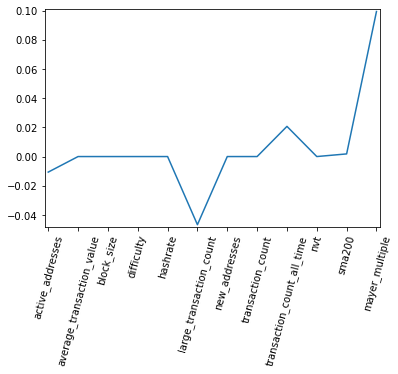

In [154]:
lasso = Lasso(alpha=0.00002,normalize=True)
# Fit the regressor to the data
lasso.fit(X_train_mm_scaled,y_train_mm_scaled)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
# Plot the coefficients
plt.plot(range(len(X_train_mm_scaled.columns)), lasso_coef)
plt.xticks(range(len(X_train_mm_scaled.columns)), X_train_mm_scaled.columns.values, rotation=75)
plt.margins(0.01)
plt.show()

### The following code via https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

training score: 0.0
test score:  -0.0009938251550856148
number of features used:  0
training score for alpha=0.01: 0.0
test score for alpha =0.01:  -0.0009938251550856148
number of features used: for alpha =0.01: 0
training score for alpha=0.0001: 0.022336135054120243
test score for alpha =0.0001:  0.030845770875740697
number of features used: for alpha =0.0001: 12


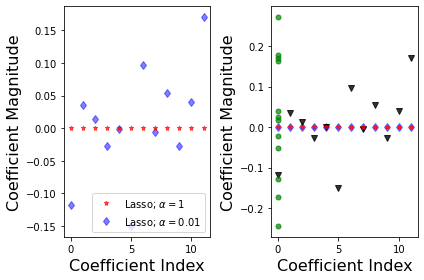

In [166]:
lasso = Lasso()
lasso.fit(X_train_mm_scaled,y_train_mm_scaled)
train_score=lasso.score(X_train_mm_scaled,y_train_mm_scaled)
test_score=lasso.score(X_test_mm_scaled,y_test_mm_scaled)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train_mm_scaled,y_train_mm_scaled)
train_score001=lasso001.score(X_train_mm_scaled,y_train_mm_scaled)
test_score001=lasso001.score(X_test_mm_scaled,y_test_mm_scaled)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.00001, max_iter=10e5)
lasso00001.fit(X_train_mm_scaled,y_train_mm_scaled)
train_score00001=lasso00001.score(X_train_mm_scaled,y_train_mm_scaled)
test_score00001=lasso00001.score(X_test_mm_scaled,y_test_mm_scaled)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

#lr = LinearRegression()
#lr.fit(X_train_ss_scaled,y_train_ss_scaled)
#lr_train_score=lr.score(X_train_ss_scaled,y_train_ss_scaled)
#lr_test_score=lr.score(X_test_ss_scaled,y_test_ss_scaled)
#print ("LR training score:", lr_train_score) 
#print ("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=10,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
#plt.legend(fontsize=9,loc=4)
plt.tight_layout()
plt.show()

### Std Scaler Output

In [115]:
ss_scaler = StandardScaler()

In [116]:
X_train_ss_scaled = pd.DataFrame(ss_scaler.fit_transform(X_train),columns = X_train.columns, index = X_train.index)

In [136]:
X_ss_scaler = ss_scaler.fit(X_train)

In [137]:
# X test scaler based on X training set
X_test_ss_scaled = X_ss_scaler.transform(X_test)

In [117]:
y_train_ss_scaled = ss_scaler.fit_transform(y_train)

In [139]:
y_ss_scaler = ss_scaler.fit(y_train)

In [140]:
# y test scaler based on y training set
y_test_ss_scaled = y_ss_scaler.transform(y_test)

[-0.09135294  0.00677076  0.         -0.         -0.01830966 -0.10795857
  0.05111628  0.          0.0974714  -0.02568263  0.07726596  0.2125574 ]


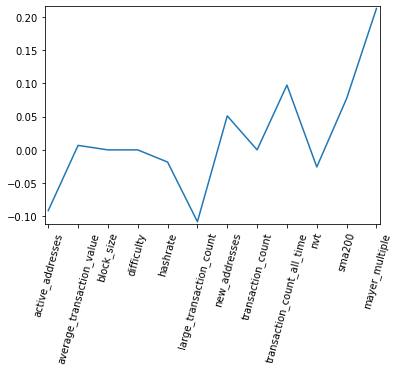

In [135]:
lasso = Lasso(alpha=0.0001,normalize=True)
# Fit the regressor to the data
lasso.fit(X_train_ss_scaled,y_train_ss_scaled)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
# Plot the coefficients
plt.plot(range(len(X_train_ss_scaled.columns)), lasso_coef)
plt.xticks(range(len(X_train_ss_scaled.columns)), X_train_ss_scaled.columns.values, rotation=75)
plt.margins(0.01)
plt.show()

training score: 0.0
test score:  -0.0009938251550858368
number of features used:  0
training score for alpha=0.01: 0.01479537655441665
test score for alpha =0.01:  0.03533220060401154
number of features used: for alpha =0.01: 4
training score for alpha=0.0001: 0.02243891565289091
test score for alpha =0.0001:  0.030164170437724014
number of features used: for alpha =0.0001: 12


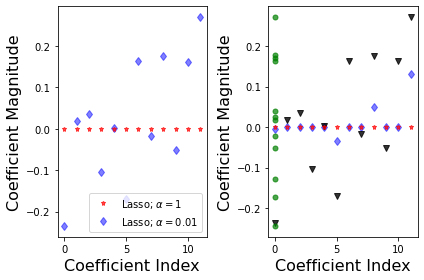

In [164]:
lasso = Lasso()
lasso.fit(X_train_ss_scaled,y_train_ss_scaled)
train_score=lasso.score(X_train_ss_scaled,y_train_ss_scaled)
test_score=lasso.score(X_test_ss_scaled,y_test_ss_scaled)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train_ss_scaled,y_train_ss_scaled)
train_score001=lasso001.score(X_train_ss_scaled,y_train_ss_scaled)
test_score001=lasso001.score(X_test_ss_scaled,y_test_ss_scaled)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso0001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso0001.fit(X_train_ss_scaled,y_train_ss_scaled)
train_score0001=lasso0001.score(X_train_ss_scaled,y_train_ss_scaled)
test_score0001=lasso0001.score(X_test_ss_scaled,y_test_ss_scaled)
coeff_used0001 = np.sum(lasso0001.coef_!=0)
print ("training score for alpha=0.0001:", train_score0001) 
print ("test score for alpha =0.0001: ", test_score0001)
print ("number of features used: for alpha =0.0001:", coeff_used0001)
#lr = LinearRegression()
#lr.fit(X_train_ss_scaled,y_train_ss_scaled)
#lr_train_score=lr.score(X_train_ss_scaled,y_train_ss_scaled)
#lr_test_score=lr.score(X_test_ss_scaled,y_test_ss_scaled)
#print ("LR training score:", lr_train_score) 
#print ("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso0001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=10,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso0001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
#plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()